<a href="https://colab.research.google.com/github/gabrielcapela/Data-Science-Portfolio/blob/main/Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Analisando Airbnb" width="50%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


Análise dos Dados do Airbnb - **Barcelona**

*by Gabriel Capela*

O [Airbnb](https://www.airbnb.com.br/) foi criado em hotel em 2008, inicialmente com o nome de Airbed & Breakfast, com o intuito de conectar viajantes e anfitriões para alugar seus quartos ou imóveis completos de maneira prática pela internet.

Segundo dados de seu [site oficial](https://news.airbnb.com/br/about-us/), o Airbnb até dezembro de 2023, possui anúncios ativos em 100 mil cidades espalhadas por mais de 220 países ao redor do mundo, totalizando mais de 5 milhões de anfitriões.

Uma dessas cidades é Barcelona, sendo uma das cidades mais conhecidades do mundo e a segunda maior cidade da Espanha, Barcelona é famosa pela sua arquitetura, gastronomia e opções originais de lazer.


<center><img alt="Analisando Airbnb" width="65%" src="https://i.natgeofe.com/n/e4996b18-0a25-45e7-8a9d-caca1e8fcf89/citybreak_barcelona_AWL_ES02360_HR_4x3.jpg"></center>





Em 2023 a cidade de Barcelona recebeu [15,6 milhões de turistas](https://www.observatoriturisme.barcelona/es/noticias/el-destino-barcelona-cierra-el-a%C3%B1o-2023-con-26-m-de-turistas-y-un-impacto-econ%C3%B3mico-del#:~:text=Seg%C3%BAn%20los%20c%C3%A1lculos%20del%20OTB,26%20M%20de%20personas%20turistas.), dos quais se hospedaram em hóteis, hostels e acomodações de plataformas como o Airbnb.
Uma importante iniciativa do Airbnb é disponiblizar seus dados, relativos a algumas das principais cidades do mundo. Tais dados podem ser encontrados no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e Barcelona está entre as cidades disponíveis.



# **Obtenção dos Dados**

Usaremos a linguagem de programação Python para efetuar a análise de dados.


In [630]:
# Importando os pacotes necessários:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [631]:
# Importando o arquivo barcelona.csv, obtido através do portal 'Inside Airbnb', para um DataFrame (df) :
df = pd.read_csv('/content/barcelona_listings.csv')

# **Análise dos Dados**

Nossa análise será guiada por alguns passos, de modo a facilitar o raciocínio.


## 1) Verificação dos tipos das variáveis e do tamanho do nosso *dataset*

Importante passo inicial, para verificar como iremos tratar as variáveis

Como primeiro passo na análise, verificaremos as 5 primeiras entradas do DataFrame e suas respectivas Series:

In [632]:
# Mostrar as 5 primeiras entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Attic Sagrada Familia,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.170440,Entire home/apt,165.0,3,29,2024-03-01,0.17,1,7,12,NaN
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210.0,1,40,2023-11-07,0.30,28,252,6,HUTB-002062
2,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,240.0,3,74,2023-11-25,0.47,1,250,8,HUTB005057
3,97529,Furnished one bedroom apartment with bathroom,497450,Francesc,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.408791,2.166066,Entire home/apt,NaN,120,67,2022-10-31,0.45,1,0,0,NaN
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,129.0,1,112,2024-02-22,0.73,3,248,22,HUTB-001722


Para melhorar a nossa consciência situacional, vamos explicar o significado de cada variável.

---
 **Dicionário das variáveis**


* **id** - número de id gerado para identificar o imóvel
* **name** - nome da propriedade anunciada
* **host_id** - número de id do proprietário (anfitrião) da propriedade
* **host_name** - Nome do anfitrião
* **neighbourhood_group** - nome do distrito
* **neighbourhood** - nome do bairro
* **latitude** - coordenada da latitude da propriedade
* **longitude** - coordenada da longitude da propriedade
* **room_type** - informa o tipo de quarto que é oferecido
* **price** - preço para alugar o imóvel
* **minimum_nights** - quantidade mínima de noites para reservar
* **number_of_reviews** - número de reviews que a propriedade possui
* **last_review** - data do último review
* **reviews_per_month** - quantidade de reviews por mês
* **calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
* **availability_365** - número de dias de disponibilidade dentro de 365 dias
* **number_of_reviews_ltm** - número de avaliações nos últimos doze meses
* **license** - código da licença
---
Como o **id** é único para cada imóvel, podemos usar esse atributo como sua *key*.
Em seguida, verificaremos o tamanho do DataFrame e o tipo de cada variável.



In [633]:
#Selecionando a coluna "id" como key:
df.set_index('id', inplace=True)

# Identificando a quantidade de dados do DataFrame:
print(f"Nosso DataFrame possui {df.shape[0]} entradas e {df.shape[1]} variáveis.\n")

# Verificando os tipos de variável:
print("Os tipos de cada variável estão relacionados a seguir:\n")
df.dtypes



Nosso DataFrame possui 18519 entradas e 17 variáveis.

Os tipos de cada variável estão relacionados a seguir:



name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## 2) Verificação e tratamento dos valores ausentes no *dataset*

Nenhum conjunto de dados do mundo real é perfeito, com todos os seus campos preenchidos de maneira uniforme. Geralmente encontramos esses dados com valores ausentes, somados a padronizações e escalas diferentes.

In [634]:
# Ordenando em ordem decrescente a porcentagem das variáveis com valores ausentes:
(df.isnull().sum()).sort_values(ascending=False)/df.shape[0]

license                           0.324964
last_review                       0.256871
reviews_per_month                 0.256871
price                             0.208597
host_name                         0.000108
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood_group               0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
name                              0.000000
dtype: float64

É admissivel que algumas entradas não possuam a sua variável **license** no DataFrame, seja por ser um dado não disponível publicamente em algumas situações ou até outros trâmites burocráticos que impediram a sua disponibilização para nossa fonte inicial. A falta do código da licença não interferirá em nossa análise.

Porém, 25% das entradas possuem as variáveis **last_review** e **reviews_per_month** nulas. Uma quantidade significativa, essa ausência interferirá em nossa análise, porém podemos observar que não há nenhum entrada com a variável **number_of_reviews** nula. Uma posibilidade é de que algumas acomodações nunca receberam uma avaliação (review). Verifiquemos:

In [635]:
#Verificando quantas entradas possuem o valor zero em sua Series 'number_of_reviews':
number_of_zero_reviews = df[df['number_of_reviews'] == 0]
print(number_of_zero_reviews.shape[0])

#Verificando se as entradas que possuem o valor zero em sua Series 'number_of_reviews' são exatamente
# as mesmas que possuem as Series last_review e reviews_per_month nulas:
print(number_of_zero_reviews['last_review'].isnull().sum())
print(number_of_zero_reviews['reviews_per_month'].isnull().sum())


4757
4757
4757


Conclui-se que as entradas com as variáveis **last_review** e **reviews_per_month** nulas são as mesmas entradas com a variável **number_of_reviews** nula.
A variável **last_review** se refere a datas, logo não pode ser substituida. Já a variável **reviews_per_month** refere-se a números inteiros, podemos substituir as entradas nulas por zero e transforma-lá para o tipo Inteiro.

In [636]:
# Substituindo os valores ausentes da Series 'reviews_per_month' pelo número zero e
#Transformando a series 'reviews_per_month' para inteiro:

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df['reviews_per_month'] = df['reviews_per_month'].astype(int)

Por último, temos a variável **price** com 3863 valores ausentes. O preço da diária é uma das variáveis mais importantes nesse tipo de *dataset*. Caso não fosse, poderíamos optar por excluir toda a coluna, mas nesse caso, excluiremos apenas as entradas (linhas) com valores ausentes.

In [637]:
#Excluindo as entradas que contenham a variável 'price' nula:
df = df.dropna(subset=['price'])

In [638]:
# Verificando a quantidade e tipos de dados do DataFrame após o tratamento:
print(f"Nosso DataFrame possui {df.shape[0]} entradas e {df.shape[1]} variáveis.\n")
print("Os tipos de cada variável estão relacionados a seguir:\n")
df.dtypes


Nosso DataFrame possui 14656 entradas e 17 variáveis.

Os tipos de cada variável estão relacionados a seguir:



name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [639]:
#Verificando os valores ausentes do novo Dataframe:
(df.isnull().sum()).sort_values(ascending=False)


license                           4053
last_review                       3273
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
reviews_per_month                    0
number_of_reviews                    0
name                                 0
host_id                              0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_name                            0
price                                0
dtype: int64

## 3) Identificação e tratamento dos *Outliers*

Outliers são valores que se diferenciam significativamente da maioria dos dados de um *dataset*, podendo influenciar de maneira desproporcional as análises estatísticas e resultados.

Inicialmente, fazemos um overview da estatística descritiva das variáveis:

In [640]:
#Visualizando métricas estatísticas:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.465600e+04,14656.000000,14656.000000,14656.000000,14656.000000,14656.000000,14656.000000,14656.000000,14656.000000,14656.000000
mean,1.806646e+08,41.392076,2.166867,146.488264,14.886599,52.464520,0.915802,42.460221,195.648062,14.335153
std,1.867098e+08,0.013770,0.017303,237.278114,19.120297,100.454297,1.788666,80.155851,107.792498,26.173567
min,1.070400e+04,41.352720,2.091740,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.090138e+06,41.381170,2.156557,60.000000,1.000000,1.000000,0.000000,2.000000,109.000000,0.000000
50%,1.057835e+08,41.390160,2.167556,112.000000,3.000000,9.000000,0.000000,8.000000,212.000000,3.000000
75%,3.463675e+08,41.401314,2.177235,180.000000,31.000000,59.000000,1.000000,36.000000,281.000000,22.000000
max,5.677036e+08,41.458092,2.227710,11999.000000,365.000000,2016.000000,68.000000,358.000000,365.000000,1197.000000


### Variáveis **minimum_nights**, **reviews_per_month** e **number_of_reviews_ltm**

A variável **minimum_nights** possui alguma(s) entradas fora do senso comum, chegando ao valor máximo de  365. Adotaremos como limite máximo coerente para uma plataforma como o Airbnb de três meses (90 dias). Alguns anfitriões podem ter a intenção de divulgar nessa plataforma locações regulares, com a estadia mínima de um ano (365 dias), porém essa análise se limita aos imóveis destinados a temporadas e poucos dias.


As variáveis **reviews_per_month** e **number_of_reviews_ltm** possuem valores respectivamente acima de, 30 e 365 dias. Tais entradas devem ser excluídas, porque é impossível ter mais de uma review por dia.

Inicialmente verificaremos o Boxplot dessas variáveis e excluiremos as entradas que não estejam de acordo, a príncipio, com a regra supracitada.


O Dataset possui 14656 entradas, das quais 59 possuem 
 sua variável 'minimum_nights' acima de 90 dias,  
 representando 0.40% do Dataset


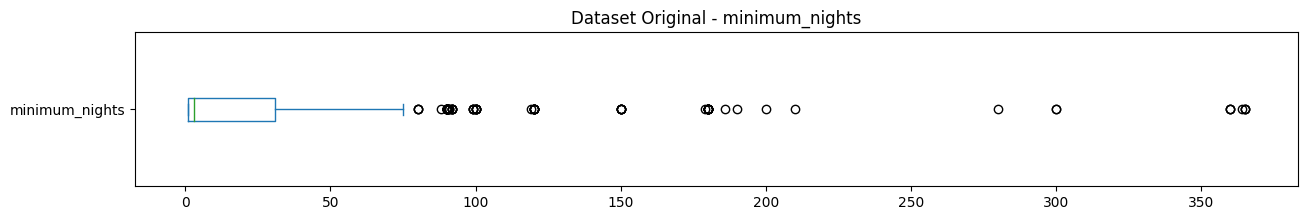

In [641]:
#Verificando o Boxplot de 'minimum_nights'e
# a quantidade de entradas acima de 90 dias:
fig, ax = plt.subplots(figsize=(15,2))
df.minimum_nights.plot( kind='box', vert = False);
ax.set_title('Dataset Original - minimum_nights')
qtd_mn_above = df.loc[df.minimum_nights > 90].shape[0]
print(f"O Dataset possui {df.shape[0]} entradas, das quais {qtd_mn_above} possuem \n sua variável 'minimum_nights' acima de 90 dias,  \n representando {(qtd_mn_above / df.shape[0]) * 100:.2f}% do Dataset")

O Dataset possui 14656 entradas, das quais 4 possuem 
 sua variável 'reviews_per_month' acima de 30 dias,  
 representando 0.03% do Dataset


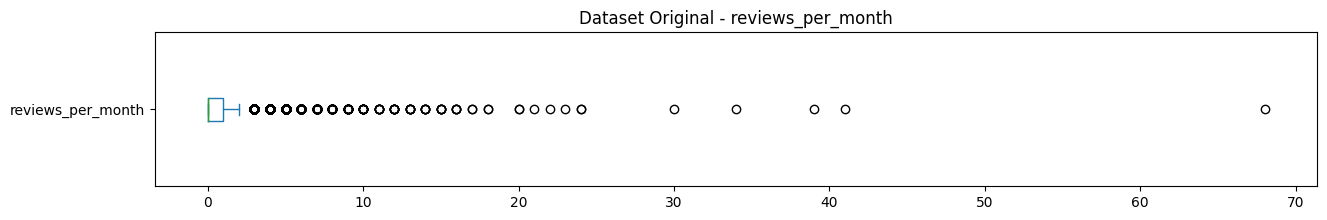

In [642]:
#Verificando o Boxplot de 'reviews_per_month'e
# a quantidade de entradas acima de 30 dias:
fig, ax = plt.subplots(figsize=(15,2))
df.reviews_per_month.plot( kind='box', vert = False);
ax.set_title('Dataset Original - reviews_per_month')
qtd_rpm_above = df.loc[df. reviews_per_month>30].shape[0]
print(f"O Dataset possui {df.shape[0]} entradas, das quais {qtd_rpm_above} possuem \n sua variável 'reviews_per_month' acima de 30 dias,  \n representando {(qtd_rpm_above/ df.shape[0]) * 100:.2f}% do Dataset")


O Dataset possui 14656 entradas, das quais 6 possuem 
 sua variável 'number_of_reviews_ltm' acima de 365 dias,  
 representando 0.04% do Dataset


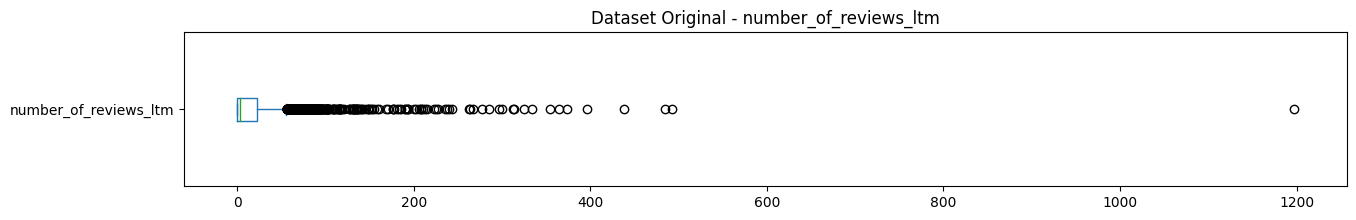

In [643]:
#Verificando o Boxplot de 'number_of_reviews_ltm'e
# a quantidade de entradas acima de 365 dias:
fig, ax = plt.subplots(figsize=(15,2))
df.number_of_reviews_ltm.plot( kind='box', vert = False);
ax.set_title('Dataset Original - number_of_reviews_ltm')
qtd_nr_ltm_above = df.loc[df.number_of_reviews_ltm>365].shape[0]
print(f"O Dataset possui {df.shape[0]} entradas, das quais {qtd_nr_ltm_above} possuem \n sua variável 'number_of_reviews_ltm' acima de 365 dias,  \n representando {(qtd_nr_ltm_above/ df.shape[0]) * 100:.2f}% do Dataset")


Todos os outliers encontrados representam uma pequena porcentagem do volume total de dados, logo serão excluídos.

In [644]:
#Excluindo as entradas com outliers em 'minimum_nights', 'reviews_per_month'
# e 'number_of_reviews_ltm'

df_clean = df.copy()

df_clean = df_clean.drop(df_clean[df_clean['minimum_nights'] > 90].index)
df_clean = df_clean.drop(df_clean[df_clean['reviews_per_month'] > 30].index)
df_clean = df_clean.drop(df_clean[df_clean['number_of_reviews_ltm'] > 365].index)

In [645]:
df_clean.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.459000e+04,14590.000000,14590.000000,14590.000000,14590.000000,14590.000000,14590.000000,14590.000000,14590.000000,14590.000000
mean,1.808892e+08,41.392086,2.166878,146.451542,14.262988,52.097601,0.903838,42.539479,195.551542,14.139890
std,1.867827e+08,0.013773,0.017291,237.235580,15.453822,96.915662,1.601804,80.174699,107.693462,22.837242
min,1.070400e+04,41.352720,2.091740,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.127290e+06,41.381181,2.156560,60.000000,1.000000,1.000000,0.000000,2.000000,109.000000,0.000000
50%,1.074896e+08,41.390170,2.167560,112.000000,3.000000,9.000000,0.000000,8.000000,212.000000,3.500000
75%,3.463675e+08,41.401318,2.177230,180.000000,31.000000,59.000000,1.000000,36.000000,281.000000,22.000000
max,5.677036e+08,41.458092,2.227710,11999.000000,90.000000,1189.000000,30.000000,358.000000,365.000000,364.000000


Text(0.5, 1.0, 'Dataset cleaned - minimum_nights')

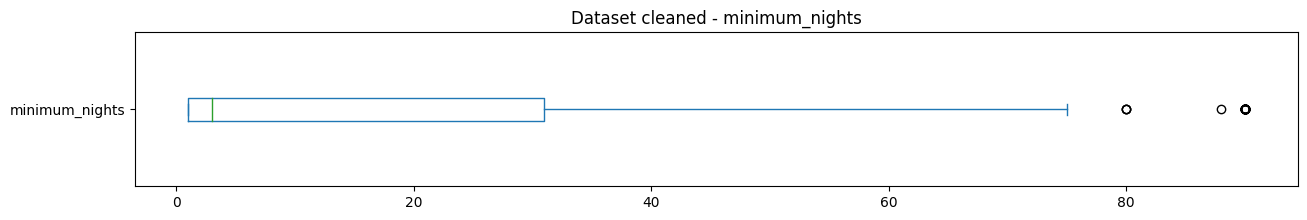

In [646]:
#Verificando novamente os Boxplot de 'minimum_nights', 'reviews_per_month'
# e 'number_of_reviews_ltm'

fig, ax = plt.subplots(figsize=(15,2))
df_clean.minimum_nights.plot( kind='box', vert = False);
ax.set_title('Dataset cleaned - minimum_nights')


Text(0.5, 1.0, 'Dataset cleaned - reviews_per_month')

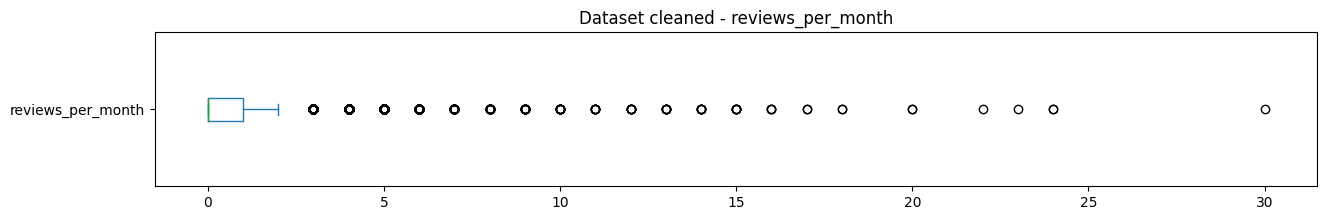

In [647]:
fig, ax = plt.subplots(figsize=(15,2))
df_clean.reviews_per_month.plot( kind='box', vert = False);
ax.set_title('Dataset cleaned - reviews_per_month')


Text(0.5, 1.0, 'Dataset cleaned - number_of_reviews_ltm')

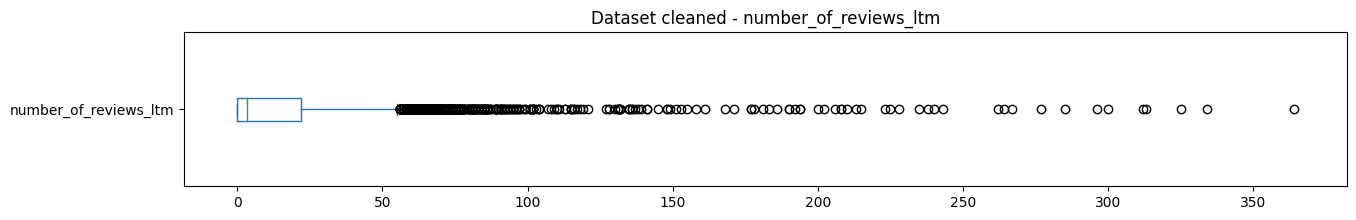

In [648]:
fig, ax = plt.subplots(figsize=(15,2))
df_clean.number_of_reviews_ltm.plot( kind='box', vert = False);
ax.set_title('Dataset cleaned - number_of_reviews_ltm')

###Variável **price**

Podemos observar que a variável **price** possui um valor médio dentro do senso comum: 146 euros; e sua mediana está próxima desse valor, com 112 euros. Porém seus máximos e mínimos distoam de suas métricas centrais: 10 e 11999. Usaremos a regra do Interquartile Range Score (IQR Score) a fim de verificar o estabelecimento limites aos outliers.

In [649]:
#Verificando as entradas com outliers de 'price', de acordo com a regra do IQR Score:
#A Regra do IQR Score, define como limite inferior a diferença entre o primeiro
#quartil com 1,5* ( a diferença entre o terceiro e primeiro quartil). E como
#limite superior a soma do terceiro quartil com 1,5* ( a diferença entre o terceiro e primeiro quartil).

# Identificando os quartis:
q1 = df.price.quantile(.25)
q3 = df.price.quantile(.75)
IQR_price = q3 - q1
print('IQR da variável price: ', IQR_price)

# Definindo os limites inferior e superior
sup_price = q3 + 1.5 * IQR_price
inf_price = q1 - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  120.0
Limite superior de price:  360.0
Limite inferior de price:  -120.0


Podemos observar, pela regra do IQR Score, que o limite inferior é negativo, o que permite qualquer preço acima de zero continuar no *dataset*. Porém o limite superior da regra do IQR Score ficou apenas em 360 euros. É normal ter diárias com valores bem maiores em uma cidade como Barcelona, principalmente se tratando de grande acomodações.

Verifiquemos o Boxplot de **price**:

Text(0.5, 1.0, 'Dataset Original - price')

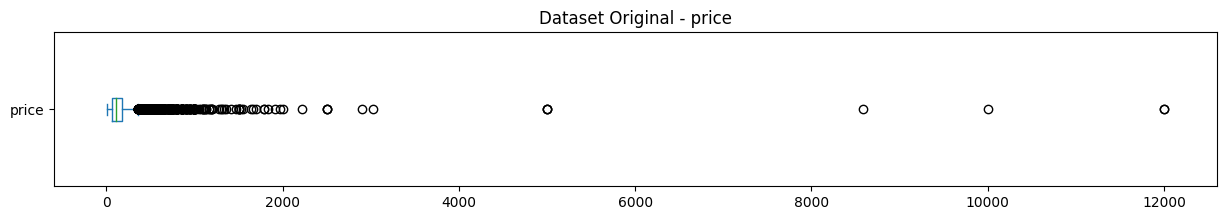

In [650]:
fig, ax = plt.subplots(figsize=(15,2))
df.price.plot( kind='box', vert = False);
ax.set_title('Dataset Original - price')

In [651]:
#Verficando quantas entradas existem com price acima de 360,
#outlier proposto pela técnica do IQR Score:

df.loc[df.price>360].shape[0]

653

Não faremos corte de outliers inferiores, porém vamos aplicar a técnica do Z-Score para definir o valor de corte para os outliers superiores, já que a técnica do IQR Score nos trouxe um limite muito abaixo

O [Z-Score](https://www.statisticshowto.com/probability-and-statistics/z-score/) representa a razão entre a diferença entre determinada entrada e a média das entradas, e o desvio padrão.

Exemplo: Em uma população com média de altura de 1,70m e desvio padrão de 0,10m, uma pessoa extremamente alta, de 2,10m de altura, possue um Z-Score de 4, dado pela fórmula:
Z = (X - µ)/ σ ; Logo:
Z = (2,1-1,7)/0,1 = 4

Nessa análise, admitiremos outliers superiores com Z-Score de no máximo 3.




In [652]:
#Calculando o limite superior que tenha um Z-Score de 3:
# 3 = (X - µ)/ σ #  X = 3*σ + µ
lim_price_above = 3*df.price.std() + df.price.mean()

print(f"Utilizaremos {lim_price_above:.2f} como limite de corte para outliers superiores.")

Utilizaremos 858.32 como limite de corte para outliers superiores.


In [653]:
#Verificando quantas entradas existem com price acima de 859,
#outlier proposto pela técnica do Z-Score:

df.loc[df.price>859].shape[0]

123

In [654]:
#Excluindo as entradas com outliers em 'price':

df_clean = df_clean.drop(df_clean[df_clean['price'] > 859].index)

Text(0.5, 1.0, 'Dataset cleaned - price')

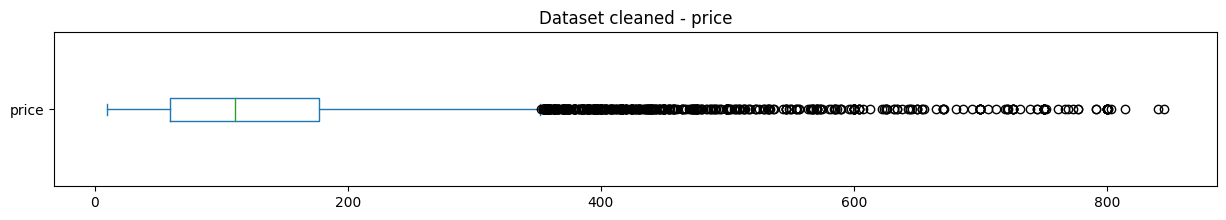

In [655]:
#Verificando novamente o Boxplot de 'price':
fig, ax = plt.subplots(figsize=(15,2))
df_clean.price.plot( kind='box', vert = False);
ax.set_title('Dataset cleaned - price')

In [673]:
df_clean.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.447200e+04,14472.000000,14472.000000,14472.000000,14472.00000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000
mean,1.807749e+08,41.392068,2.166841,134.599641,14.34743,52.383637,0.907200,42.400636,195.242261,14.219527
std,1.862840e+08,0.013770,0.017310,104.623831,15.47101,97.169160,1.605446,80.219274,107.550924,22.893931
min,1.070400e+04,41.352720,2.091740,10.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.400556e+06,41.381180,2.156530,60.000000,1.00000,1.000000,0.000000,2.000000,109.000000,0.000000
50%,1.084413e+08,41.390120,2.167513,111.000000,3.00000,10.000000,0.000000,8.000000,211.000000,4.000000
75%,3.463675e+08,41.401257,2.177170,177.000000,31.00000,60.000000,1.000000,36.000000,280.000000,22.000000
max,5.677036e+08,41.458092,2.227710,845.000000,90.00000,1189.000000,30.000000,358.000000,365.000000,364.000000


## 4) Verificação do tipo de distribuição das variáveis numéricas

Usando o tipo de gráfico histograma, podemos analisar visualmente a frequência da distribuição de cada entrada nas diversas variáveis numéricas.

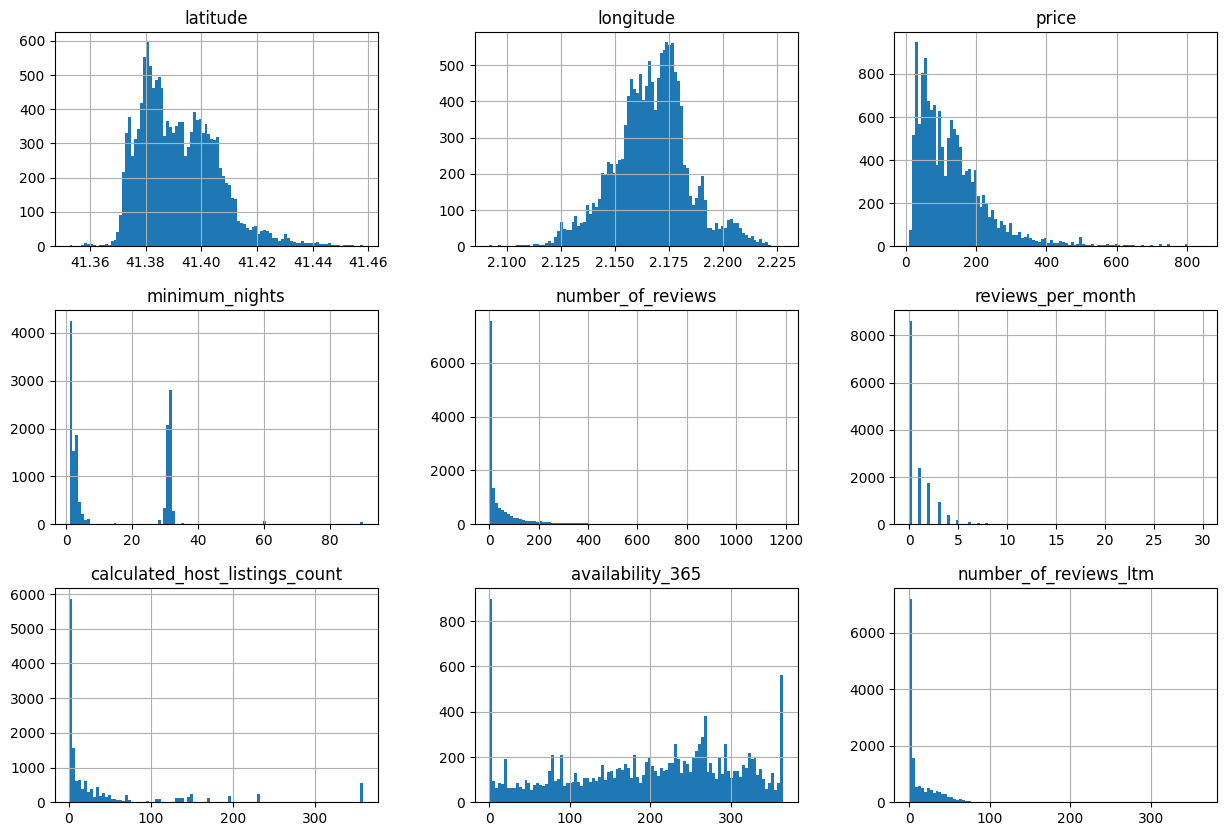

In [656]:
# Plotando o histograma das variáveis numéricas:

histogramas = df_clean.drop(columns='host_id')
histogramas.hist(bins=100, figsize=(15,10));


**Apontamentos:**


*   A variável **price** possui uma maior concentração em valores até 200 euros
*   A variável **minimun_nights** possui uma maior concentração em valores menores que 5 e próximo a 30, demonstrando que a grande parte dos anfitriões possuem um requisito mínimo de noites pequeno, no entanto, uma parcela considerável tem como requisito mínimo 1 mês (30 dias). De tal apontamento faremos uma comparação de preço entre esse dois grandes grupos;



*   As variáveis **latitude** e **longitude** demonstram a maior concentração de acomodações em determinada coordenada. Mais a frente esses dados serão plotados em uma mapa, para uma melhor visualização;
*   As variáveis **numbers_of_reviews**, **reviews_per_month**, **calcuted_host_listings_count** e **number_of_reviews_ltm** demonstram uma concentração inicial nos valores iniciais dessas variáveis, decaindo ao longo do eixo horizontal; e
*   A variável **availability_365** possui uma distribuição variada, o que não fornece um apontamento útil.



## 5) Verificação da correlação existente entre as variáveis numéricas

O coeficiente de correlação, é uma medida estatística que quantifica a força e a direção da relação linear entre duas variáveis. Esse índice varia de -1 a 1, onde um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica que não há correlação linear entre as variáveis.

In [657]:
# Definindo a matriz de correlação:

corr = df_clean[['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']].corr()

# Mostrando a matriz de correlação:
display(corr);




,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.407795,0.179592,0.085771,0.000042,0.000221,0.189960
minimum_nights,-0.407795,1.000000,-0.318947,-0.374682,0.143648,0.168055,-0.414805
number_of_reviews,0.179592,-0.318947,1.000000,0.579876,-0.160050,-0.140600,0.753580
reviews_per_month,0.085771,-0.374682,0.579876,1.000000,-0.130745,-0.188612,0.808064
calculated_host_listings_count,0.000042,0.143648,-0.160050,-0.130745,1.000000,0.133243,-0.141369
availability_365,0.000221,0.168055,-0.140600,-0.188612,0.133243,1.000000,-0.176162
number_of_reviews_ltm,0.189960,-0.414805,0.753580,0.808064,-0.141369,-0.176162,1.000000


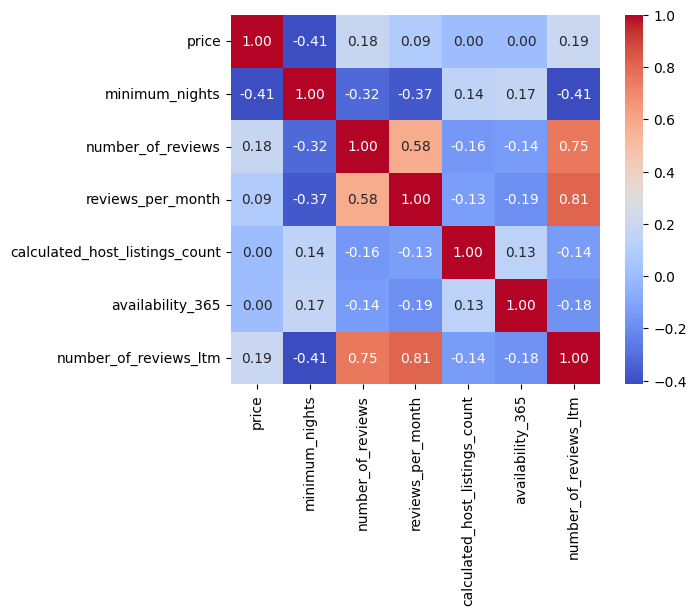

In [658]:
# Plotando um heatmap para melhor visualização das correlações
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', square=True, linecolor='white', annot=True);

É possível verificar a correlação entre as variáveis  **numbers_of_reviews**, **reviews_per_month** e **number_of_reviews_ltm**, o que é intuitivo.




## 6) Verificação das relações entre preço, tipo de imóvel e localização

Análise fim deste estudo, um dos principais *insights* que podem ser extraídos dessa análise é a relação entre preço e localidade, porém é preciso ser cauteloso, pois as acomodações possuem diferentes tamanho e capacidades. O ideal seria ter uma variável com a área de cada acomodação, de modo a obter o preço por metro quadrado de cada acomodação. Outro problema é caso tenhamos bairros com poucas acomodações, o que pode acarretar em não fornecer uma média bem definida de seu preço.


###Tipo de imóvel em relação ao preço

In [659]:
# Visualisando inicialmente a quantidade de cada tipo de imóvel
#e sua porcentagem em relação ao dataset:
df_clean.room_type.value_counts()/df_clean.shape[0]


room_type
Entire home/apt    0.679450
Private room       0.309218
Shared room        0.007463
Hotel room         0.003870
Name: count, dtype: float64

A maioria do dataset concentram-se em casas/apartamentos inteiros e quartos privados. Quartos compartilhados e quartos de hotel representam cerca de apenas 1% do dataset.

In [660]:
#Verificando a média de preço para cada tipo de imóvel:
df_clean.groupby(['room_type']).price.mean()

room_type
Entire home/apt    165.635920
Hotel room         146.785714
Private room        68.138771
Shared room         56.361111
Name: price, dtype: float64

Como esperado, as acomodações mais caras são as casas/apartamentos inteiros e os mais baratos são os quartos compartilhados. Quartos privados são mais baratos que quartos de hotel.

###Tipo de imóvel em relação a localização

In [661]:
#Inicialmente, verifiquemos a quantidade de imóveis cada distrito:
df_clean.neighbourhood_group.value_counts().sort_values(ascending=False)

neighbourhood_group
Eixample               5434
Ciutat Vella           3152
Sants-Montjuïc         1466
Sant Martí             1321
Gràcia                 1276
Sarrià-Sant Gervasi     771
Horta-Guinardó          395
Les Corts               300
Sant Andreu             211
Nou Barris              146
Name: count, dtype: int64

É possível afirmar que a maioria das acomodações se encontram-se nos distritos de  Eixample e Ciutat Vella

In [662]:
# Verificaremos agora a distribuição em cada distrito para cada tipo de imóvel,em porcentagem
#Começando pelo 'Entire home/apt' :
acomodation = df_clean[df_clean.room_type == 'Entire home/apt']
acomodation.neighbourhood_group.value_counts().sort_values(ascending=False)/acomodation.shape[0]

neighbourhood_group
Eixample               0.391640
Ciutat Vella           0.209499
Sants-Montjuïc         0.096613
Gràcia                 0.094681
Sant Martí             0.091020
Sarrià-Sant Gervasi    0.053087
Les Corts              0.023492
Horta-Guinardó         0.023391
Sant Andreu            0.011390
Nou Barris             0.005187
Name: count, dtype: float64

In [663]:
#Verificando para os 'Hotel room':
acomodation = df_clean[df_clean.room_type == 'Hotel room']
acomodation.neighbourhood_group.value_counts().sort_values(ascending=False)/acomodation.shape[0]

neighbourhood_group
Eixample          0.625000
Gràcia            0.196429
Sants-Montjuïc    0.089286
Ciutat Vella      0.053571
Sant Martí        0.035714
Name: count, dtype: float64

In [664]:
#Verificando para os 'Private room':
acomodation = df_clean[df_clean.room_type == 'Private room']
acomodation.neighbourhood_group.value_counts().sort_values(ascending=False)/acomodation.shape[0]

neighbourhood_group
Eixample               0.333408
Ciutat Vella           0.242011
Sants-Montjuïc         0.111732
Sant Martí             0.091844
Gràcia                 0.071285
Sarrià-Sant Gervasi    0.055642
Horta-Guinardó         0.036648
Sant Andreu            0.021899
Nou Barris             0.020782
Les Corts              0.014749
Name: count, dtype: float64

In [665]:
#Verificando para os 'Shared room':
acomodation = df_clean[df_clean.room_type == 'Shared room']
acomodation.neighbourhood_group.value_counts().sort_values(ascending=False)/acomodation.shape[0]

neighbourhood_group
Eixample          0.518519
Gràcia            0.138889
Sant Martí        0.120370
Sants-Montjuïc    0.101852
Ciutat Vella      0.055556
Les Corts         0.027778
Nou Barris        0.018519
Sant Andreu       0.009259
Horta-Guinardó    0.009259
Name: count, dtype: float64

Destaca-se o distrito Eixample, por posssuir o maior número de acomodações, independentemente do seu tipo.

### Preço em relação a localização

In [666]:
#Inicialmente, verifiquemos a média de preço para cada distrito:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Eixample               163.977365
Gràcia                 132.438871
Sant Martí             132.436033
Sarrià-Sant Gervasi    124.330739
Les Corts              123.786667
Ciutat Vella           113.823604
Sants-Montjuïc         107.218281
Horta-Guinardó          95.113924
Sant Andreu             78.170616
Nou Barris              67.945205
Name: price, dtype: float64

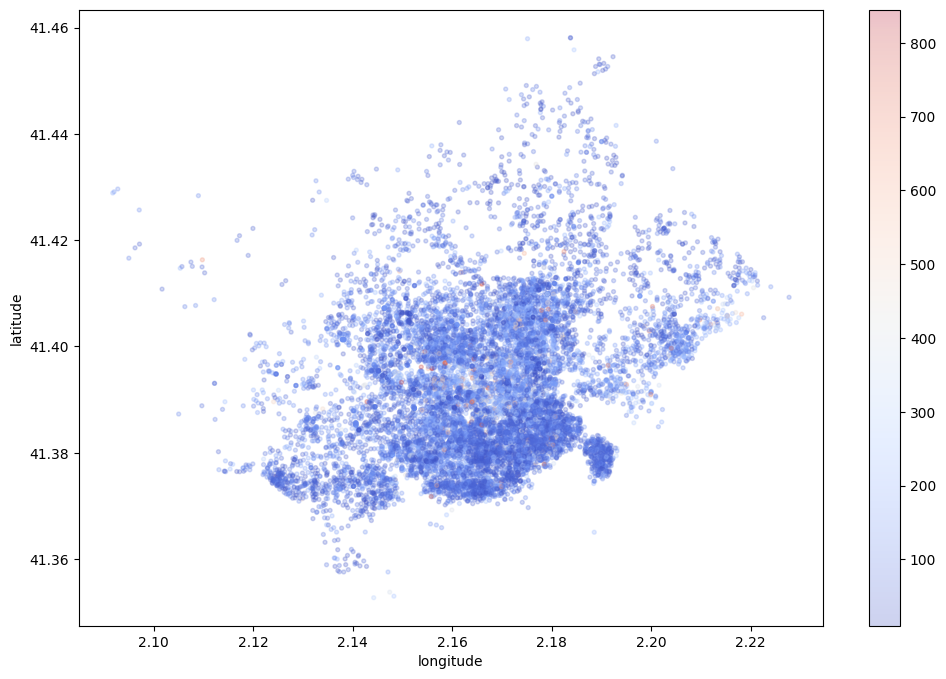

In [672]:
# Plotando os imóveis pela latitude e longitude:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.25, c=df_clean.price, s=8,
              cmap=plt.get_cmap('coolwarm'), figsize=(12,8));


O distrito Eixample, além de possuir o maior número de acomodações também é o mais caro, em média. Em seguida será analisado apenas os imóveis mais caros, acima de 400 euros a diária e verificado a sua localização.

In [668]:
#Agrupando as acomodações por distrito, limitando apenas as com diárias superiores a 400 euros:
expensive = df_clean[df_clean.price > 400]
expensive.neighbourhood_group.value_counts().sort_values(ascending=False)/expensive.shape[0]


neighbourhood_group
Eixample               0.604113
Ciutat Vella           0.195373
Sant Martí             0.064267
Gràcia                 0.048843
Sants-Montjuïc         0.035990
Sarrià-Sant Gervasi    0.020566
Horta-Guinardó         0.015424
Les Corts              0.010283
Nou Barris             0.002571
Sant Andreu            0.002571
Name: count, dtype: float64

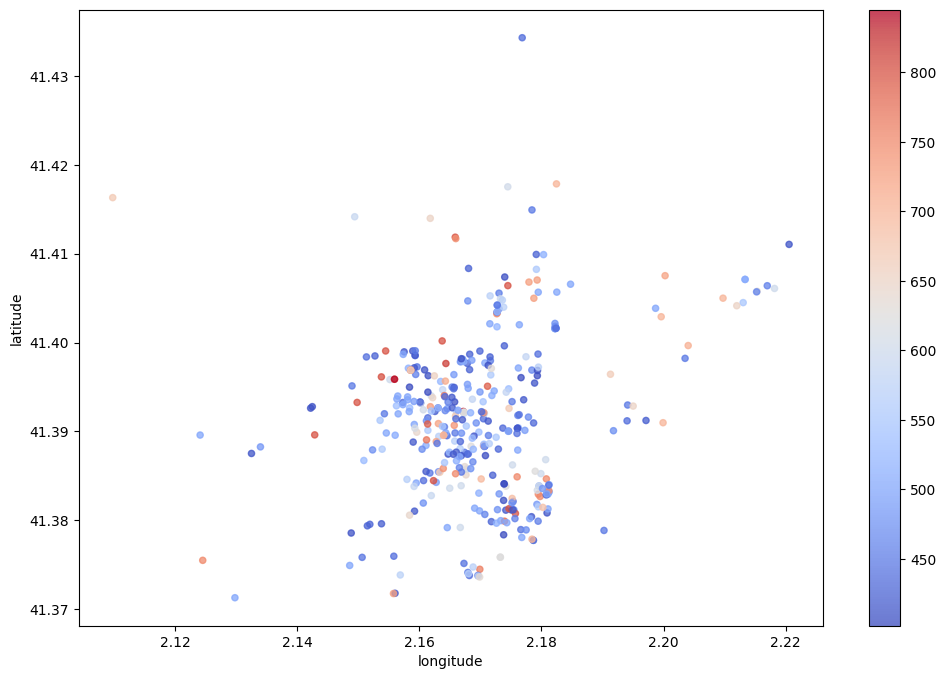

In [669]:
#Plotando as coordenadas das acomodações mais caras:
expensive.plot(kind="scatter", x='longitude', y='latitude', alpha=0.75, c=expensive.price, s=20,
              cmap=plt.get_cmap('coolwarm'), figsize=(12,8));

Os distritos Eixample e Ciutat Vella possuem a maioria dos imóveis com valor de diária maior que 400 euros.

### Relação entre Preço e minímo de noites para aluguel

Na plotagem de histograma, foi possível observar para a variável minimun_nights uma concentração acentuada para valores próximos a 5 e outra grande concentração para valores próximos a 30. Faremos uma comparação entre os preços desses dois grupos

In [670]:
#Verificando a média do preço da diária das acomodações que requerem
# uma estadia mínima de até 10 dias:
mean_price_5night = df_clean[df_clean.minimum_nights<=10]
mean_price_5night.price.mean()

170.69186792672966

In [671]:
#Verificando a média do preço da diária das acomodações que requerem
# uma estadia mínima entre 25 e 35 dias:
mean_price_30night = df_clean[df_clean.minimum_nights<=35]
mean_price_30night = mean_price_30night[mean_price_30night.minimum_nights>25]
mean_price_30night.price.mean()

82.13377154023806

É possível observar que os imóveis que requerem cerca de 30 dias como estadia miníma são, em média, 50% mais baratos do que os imóveis que requerem poucos dias de estadia miníma.

# **Conclusões**


Em primeiro lugar fica exposto a necessidade de conhecer o tipo de contexto que gerou os dados analisados, é de suma importância a pesquisa prévia nesse caso, sobre o Airbnb e a cidade de Barcelona. O cientista de dados deve saber sobre a cidade, principalmente as diferenças entre os seus bairros e distritos. É preciso conhecer também as regras de negócio de uma empresa como o Airbnb, destacando a multidisciplinaridade necessária para uma análise eficiente.

O tratamento de dados, seja de *outliers* ou de valores ausentes é um passo muito importante, a decisão para excluir determinados dados nesse estudo foi tomada com base em regras matemáticas e observando certas lógicas inerentes ao modelo de negócio, como, por exemplo, o máximo de um *review* por dia.

Essa análise permitiu verificar a importância do distrito de *Eixample* para o Airbnb em Barcelona, distrito de localização privilegiada, aonde se localiza o Templo Expiatório da Sagrada Família e aonde se concentram a maiorias das acomodações. *Eixample* possui a maioria das acomodações mais caras, porém mantém a sua variedade de opcões, a média de 163.9 euros para o valor da diária não é muito distante da média da cidade de Barcelona como um todo (134,6 euros).

Outra descoberta importante foi a diferença de finalidades do uso do Airbnb, a maioria dos anfitriões usa a plataforma para disponibilizar sua acomodação para aluguéis de poucas noites, porém uma parcela considerável usa a plataforma para aluguel de temporadas, nesse caso o preço da diária decresce consideravelmente.

Com isso, ressalta-se a importância de uma minuciosa análise de dados, que tem a capacidade de gerar *insights* valiosos para uma tomada de decisão. As conclusões aqui obtidas podem desde subsidiar o planejamento de uma viagem particular até preparar uma correta implementação de determinado modelo de *machine learning*.


